Consider a WGN process {Xn : n ∈ N} with variance 1. We define the moving average process
{Yn, n ∈ N}, where Yn = 1
N
PN−1
i=0 Xn−i. Simulate M = 104 realizations of the MA process for
n ∈ {1, 2, · · · , 10}. Using these realizations,
• estimate and plot the mean process, μY (n), for n ∈ {1, 2, · · · , 10}
• estimate the covariance CY (Δ) = 1
M
PM
i=1 yin
1yin
2 , where yin
is the realization of Yn in the
ith sample path.
Using these mean and covariance estimates, determine if {Yn, n ∈ N} is a W.S.S process.

In [11]:
import numpy as np
import matplotlib.pyplot as plt


In [12]:
def simulate_moving_averages(M = 10000,num_n = 10,N_win=5,seed=42):

  np.random.seed(seed)

  # Length of X needed so that 'valid' convolution yields exactly num_n outputs:
  # If len(X) = Lx, then len(conv_valid) = Lx - N_win + 1.
  # We want len(conv_valid) = num_n  => Lx = num_n + N_win - 1.

  Lx = num_n + N_win - 1

  # pre allocate outputs and define MA averaging kernel
  Y = np.zeros((M,num_n),dtype=float)
  kernel = np.ones(N_win,dtype=float)/N_win

  # generate M independent WGN sequences and filter each with MA kernel
  for i in range(M):
    X = np.random.normal(loc=0.0,scale=1.0,size=Lx) # WGN N(0,1)
    Y[i,:] = np.convolve(X,kernel,mode='valid') # avoid edge effects

  # Estimate mean process μ_Y(n) = E[Y_n] by averaging over realizations
  mu_hat = Y.mean(axis=0)


  # Estimate covariance vs lag Δ
  max_delta = num_n - 1
  C_hat_pool = np.empty(max_delta+1 , dtype=float)
  for d in range(max_delta+1):
    # pooled: average Y[n]*Y[n+d] over all valid n and all realizations
    C_hat_pool[d] = (Y[:,:num_n-d]*Y[:,d:]).mean()

  # single-pair: exactly the form in the prompt (n1=1, n2=1+Δ), averaged over realizations
  C_hat_singlepair = np.array([np.mean(Y[:,0]*Y[:,d]) for d in range(max_delta+1)])

  # Theoretical covariance for MA(N_win) driven by N(0,1)

  C_theory = np.array([ (N_win - d)/(N_win**2) if d < N_win else 0.0 for d in range(max_delta+1) ])


  return Y , mu_hat , C_hat_pool , C_hat_singlepair , C_theory







In [13]:
M = 10000
num_n = 10
N_win = 5

# run the simulation
Y, mu_hat, C_pool, C_single, C_th = simulate_moving_averages(M=M, num_n=num_n, N_win=N_win, seed=123)



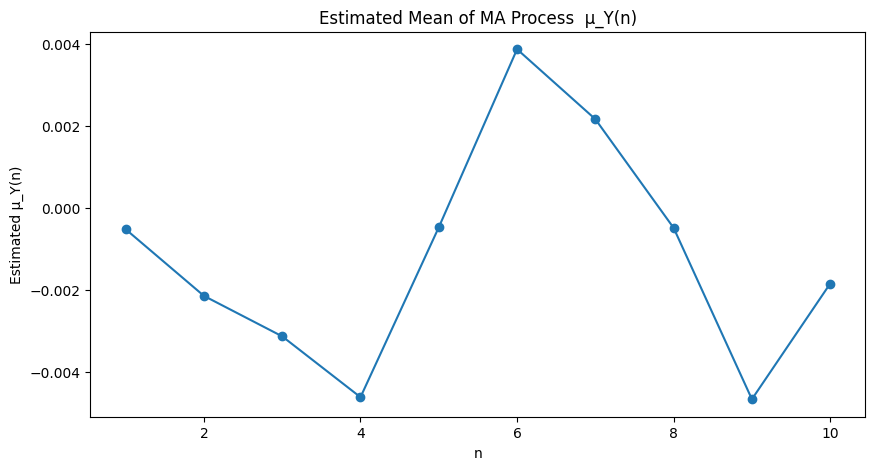

In [14]:
# plt estimated mean μ_Y(n)

plt.figure(figsize=(10,5))
plt.plot(np.arange(1,num_n+1),mu_hat,marker='o')
plt.title("Estimated Mean of MA Process  μ_Y(n)")
plt.xlabel("n")
plt.ylabel("Estimated μ_Y(n)")
plt.grid(False)
plt.show()

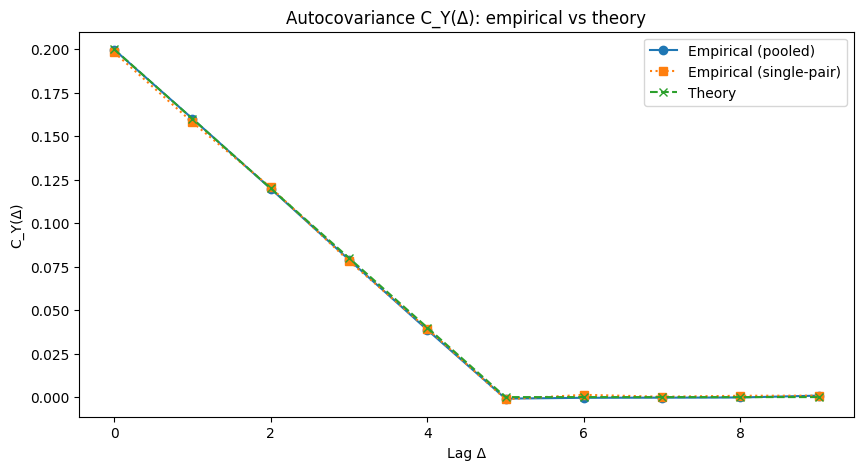

In [15]:
# Plot covariance vs lag Δ


lags = np.arange(num_n)
plt.figure(figsize=(10, 5))
plt.plot(lags, C_pool, marker='o', label="Empirical (pooled)")
plt.plot(lags, C_single, marker='s', linestyle=':', label="Empirical (single-pair)")
plt.plot(lags, C_th, marker='x', linestyle='--', label="Theory")
plt.title("Autocovariance C_Y(Δ): empirical vs theory")
plt.xlabel("Lag Δ")
plt.ylabel("C_Y(Δ)")
plt.legend()
plt.grid(False)
plt.show()

In [16]:
# Numerical sanity + WSS decision

mu_max_abs = float(np.max(np.abs(mu_hat)))
cov_err_max = float(np.max(np.abs(C_pool - C_th)))

print(f"Max |estimated mean| across n: {mu_max_abs:.4f}")
print(f"Max |empirical(the pooled) - theory| across lags: {cov_err_max:.4f}")

# Interpretation:
# • μ_Y(n) should be ~0 for all n (constant in n).
# • C_Y(Δ) should match the triangular theoretical curve and depend only on Δ, not on n.
# If the two numbers above are small (they will be with M=10^4), we judge the process W.S.S.

Max |estimated mean| across n: 0.0047
Max |empirical(the pooled) - theory| across lags: 0.0013


In [17]:
tolerance_mean = 0.05
tolerance_covariance = 0.05 # tolerance for matching covariance theory


if mu_max_abs < tolerance_mean and cov_err_max < tolerance_covariance:
    print("The process is (approximately) W.S.S. within simulation tolerance.")
else:
    print("The process is NOT W.S.S. (significant deviation found).")


The process is (approximately) W.S.S. within simulation tolerance.
